<a href="https://colab.research.google.com/github/velamalaappu/ICC-UNSUPERVISEDML-ANALYSIS/blob/main/MODULE4_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

**PROBLEM STATEMENT**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

Content

The Book-Crossing dataset comprises 3 files.

● Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.
● Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,expressed by 0.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from imageio import imread
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import requests
from mlxtend.frequent_patterns import apriori, association_rules
books = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HG/Books.csv",sep=',',  index_col=False, dtype='unicode')
ratings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HG/Ratings.csv")
users = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HG/Users.csv")


In [3]:
user_rating_df = ratings.merge(users, how="left", on='User-ID')
book_user_rating = books.merge(user_rating_df, how="left", on='ISBN')
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating','Image-URL-L']]
book_user_rating.reset_index(drop=True, inplace=True)
book_user_rating.dropna(inplace=True)

In [4]:
# kitaplara unique id verme işlemi
bookid = []
bookname = []
for i, j in enumerate(book_user_rating["Book-Title"].unique()):
    bookid.append(i)
    bookname.append(j)
dictbook = {'bookid': bookid, 'Book-Title': bookname, }
dfbook = pd.DataFrame(dictbook)
book_user_rating = book_user_rating.merge(dfbook, how="left", on='Book-Title')

In [5]:
# userlara unique id verme işlemi
userid = []
username = []
for i, j in enumerate(book_user_rating["User-ID"].unique()):
    userid.append(i)
    username.append(j)
dictuser = {'userid': userid, 'User-ID': username, }
dfuser = pd.DataFrame(dictuser)
book_user_rating = book_user_rating.merge(dfuser, how="left", on='User-ID')

book = book_user_rating[["Book-Title", "Book-Rating", "bookid", "userid","Image-URL-L"]]

In [6]:
book.rename(columns={"Book-Title": "title", "Book-Rating": "rating", }, inplace=True)

rating_counts = pd.DataFrame(book["title"].value_counts())

rare_books = rating_counts[rating_counts["title"] < 200].index


common_books = book[~book["title"].isin(rare_books)]

common_books.drop_duplicates(inplace=True)

common_books["rating"].astype(int)

user_book_df = common_books.pivot_table(index=["userid"], columns=["bookid"], values="rating")


user_book_df.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


bookid,5,18,26,27,28,37,38,39,46,47,...,7552,7711,8602,9256,9824,9957,10422,12055,14137,14732
userid,,,,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.5,7.0,6.0,0.0,10.0,6.0,10.0,8.0,3.5,0.0,...,NaN,7.0,3.25,9.0,9.5,0.0,5.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def item_based_recommender(kitap, data):
    kitap_ad = data[kitap]

    return data.corrwith(kitap_ad).sort_values(ascending=False).head(10)

In [8]:
book.head()

,title,rating,bookid,userid,Image-URL-L
0,Classical Mythology,0.0,0,0,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,5.0,1,1,http://images.amazon.com/images/P/0002005018.0...
2,Clara Callan,0.0,1,2,http://images.amazon.com/images/P/0002005018.0...
3,Clara Callan,8.0,1,3,http://images.amazon.com/images/P/0002005018.0...
4,Clara Callan,0.0,1,4,http://images.amazon.com/images/P/0002005018.0...


In [9]:
af=item_based_recommender(7711,user_book_df)

In [10]:
af.head()

bookid
770     1.000000
46      1.000000
7711    1.000000
6754    0.962771
1370    0.960244
dtype: float64

In [11]:
af.index[0]

770

In [12]:
book_user_rating.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,Image-URL-L,bookid,userid
0,0195153448,Classical Mythology,Mark P. O. Morford,2.0,0.0,http://images.amazon.com/images/P/0195153448.0...,0,0
1,0002005018,Clara Callan,Richard Bruce Wright,8.0,5.0,http://images.amazon.com/images/P/0002005018.0...,1,1
2,0002005018,Clara Callan,Richard Bruce Wright,11400.0,0.0,http://images.amazon.com/images/P/0002005018.0...,1,2
3,0002005018,Clara Callan,Richard Bruce Wright,11676.0,8.0,http://images.amazon.com/images/P/0002005018.0...,1,3
4,0002005018,Clara Callan,Richard Bruce Wright,41385.0,0.0,http://images.amazon.com/images/P/0002005018.0...,1,4


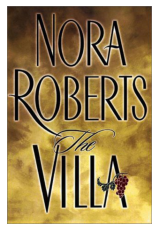

In [16]:
url0=book_user_rating[book_user_rating["bookid"]==af.index[0]]["Image-URL-L"].to_list()[0]
im0 = imread(url0)
           
plt.figure(1)
plt.axis(False)
plt.imshow(im0)